# Week 9 Module 5 Assignment 2
## Francis Yang 12/12/2022
1. Load Dataset

    * Load the prime_indians_diabetes dataset
    * Check the first five samples. Are there any categorical features?
    * Is this a classification or regression problem?
    * Check the columns of the dataset

There are 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

   * Number of times pregnant.
   * Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
   * Diastolic blood pressure (mm Hg).
   * Triceps skinfold thickness (mm).
   * 2-Hour serum insulin (mu U/ml).
   * Body mass index (weight in kg/(height in m)^2).
   * Diabetes pedigree function.
   * Age (years).
   * Class variable (0 or 1).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

data = pd.read_csv('datasets/pima_indians_diabetes.csv')

In [2]:
data.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time_pregnant_no            768 non-null    int64  
 1   plasma_concentration        768 non-null    int64  
 2   diastolic_blood_pressure    768 non-null    int64  
 3   triceps_skinfold_thickness  768 non-null    int64  
 4   serum_insulin               768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree           768 non-null    float64
 7   age                         768 non-null    int64  
 8   class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2. Data Preprocessing and Model

   * Assign features to X and target variable to y
   * Create a pipeline for preprocessing which includes imputing and standardscaling
   * Create a pipeline for preprocessor and the random forest classifier. Set n_estimators=100
   * Train the model and make your predictions on the test dataset
   * List the feature importance and the corresponding features
   * Create a bar plot for the feature importances
   * Drop the least important feature from the data and repeat the steps above

In [4]:
X = data.drop('class', axis=1)
y = data['class']

# Numeric pipeline
preprocessing = Pipeline(
    [('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())]
)

pipe = Pipeline([('preprocessing', preprocessing),
                ('model', RandomForestClassifier(n_estimators=100))])


X_train, X_test, y_train, y_test = train_test_split(X, y)
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
accuracy_score(y_test, y_hat)

0.7447916666666666

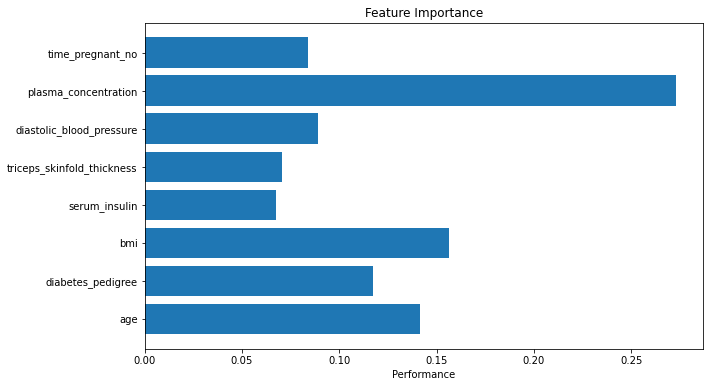

In [5]:
barx = np.arange(pipe['model'].n_features_in_)
barv = pipe['model'].feature_importances_

fig, ax = plt.subplots()
ax.barh(barx,barv)
ax.set_yticks(barx, labels=X.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Feature Importance');

Retrain model without `serum_insulin`

In [6]:
X = data.drop(['class','serum_insulin'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y)
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
accuracy_score(y_test, y_hat)

0.8020833333333334

Model performance increases with the least significant feature removed!